In [8]:
# check scikit-learn version
import sklearn
# import 
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from numpy import mean, std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold,cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import recall_score,f1_score,roc_auc_score,roc_curve,auc
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### cleveland Dataset

In [10]:
df = pd.read_csv('cleveland_clean.csv')



X = df.drop(['Class'], axis=1)
y = df['Class'] 

C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# get the dataset
def get_dataset():
    X=x
    y=y 
    return X, y

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
 
# get a voting ensemble of models - hard
def get_voting1():
    # define the base models
    models = list()

    models.append(('RF',RandomForestClassifier(n_estimators=100))) 
    models.append(('MLP',MLPClassifier(solver='adam', learning_rate_init = 0.0005, learning_rate = 'adaptive', activation="relu", max_iter=3000, random_state=10))) 
#     models.append(('DT',DecisionTreeClassifier())) 
    models.append(('KNN',KNeighborsClassifier(n_neighbors=100))) 
    models.append(('SVM',SVC(random_state=1))) 
#     models.append(('NB',GaussianNB())) 
    # define the voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='hard')

    return ensemble

def get_voting2():
    # define the base models - soft 
    models = list()

    models.append(('RF',RandomForestClassifier(n_estimators=100))) 
    models.append(('MLP',MLPClassifier(solver='adam', learning_rate_init = 0.0005, learning_rate = 'adaptive', activation="relu", max_iter=3000, random_state=10))) 
#     models.append(('DT',DecisionTreeClassifier())) 
    models.append(('KNN',KNeighborsClassifier(n_neighbors=100))) 
    models.append(('SVM',SVC(random_state=1,probability=True))) 
#     models.append(('NB',GaussianNB())) 
    # define the voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='soft')

    return ensemble
 
# get a list of models to evaluate
def get_models():
    models = dict()

    models['RF']=RandomForestClassifier(n_estimators=100)
    models['MLP']=MLPClassifier(solver='adam', learning_rate_init = 0.0005, learning_rate = 'adaptive', activation="relu", max_iter=3000, random_state=10) 
    models['DT']=DecisionTreeClassifier()
    models['KNN']=KNeighborsClassifier(n_neighbors=100)
    models['SVM']=SVC(random_state=1)
    models['NB']=GaussianNB()
    models['hard_voting'] = get_voting1()
    models['soft_voting'] = get_voting2()
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    scoring = ['precision_macro', 'recall_macro','accuracy']#'accuracy',
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
    scores = cross_validate(model, X, y, scoring=scoring)#, cv=cv, n_jobs=-1, error_score='raise')
    return scores
 

models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print ('>%s accuracy:%0.3f precision: %.3f recall: %.3f' % (name,mean(scores['test_accuracy']), mean(scores['test_precision_macro']),mean(scores['test_recall_macro'])))
    
    if name in ('soft_voting'):
        probs = model.predict_proba(X_test)
        malignant_probs = probs[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
        roc_auc = auc(fpr, tpr)
        print('aoc for soft voting model is: %0.3f' % (roc_auc))


C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


>RF accuracy:0.792 precision: 0.791 recall: 0.788
>MLP accuracy:0.825 precision: 0.828 recall: 0.822
>DT accuracy:0.759 precision: 0.759 recall: 0.756
>KNN accuracy:0.759 precision: 0.779 recall: 0.749
>SVM accuracy:0.805 precision: 0.810 recall: 0.801
>NB accuracy:0.799 precision: 0.801 recall: 0.796
>hard_voting accuracy:0.812 precision: 0.824 recall: 0.805
>soft_voting accuracy:0.825 precision: 0.828 recall: 0.821
aoc for soft voting model is: 0.900


C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


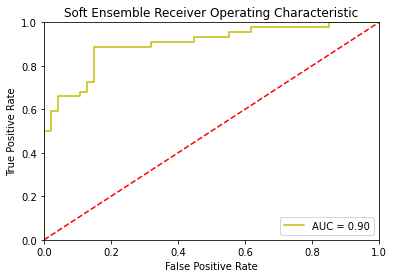

In [12]:
pyplot.title('Soft Ensemble Receiver Operating Characteristic')
pyplot.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
pyplot.legend(loc = 'lower right')
pyplot.plot([0, 1], [0, 1],'r--')
pyplot.xlim([0, 1])
pyplot.ylim([0, 1])
pyplot.ylabel('True Positive Rate')
pyplot.xlabel('False Positive Rate')
pyplot.show()

# Framingham Dataset

In [13]:
# read the data set file
df2 = pd.read_csv('framingham_clean.csv')


X = df2.drop(['TenYearCHD'], axis=1) # features
y = df2['TenYearCHD']      # label

C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# get the dataset
def get_dataset():
    X=x
    y=y 
    return X, y

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
 
# get a voting ensemble of models - hard
def get_voting1():
    # define the base models
    models = list()

    models.append(('RF',RandomForestClassifier(n_estimators=100))) 
    models.append(('MLP',MLPClassifier(solver='adam', learning_rate_init = 0.0005, learning_rate = 'adaptive', activation="relu", max_iter=3000, random_state=10))) 
#     models.append(('DT',DecisionTreeClassifier())) 
    models.append(('KNN',KNeighborsClassifier(n_neighbors=100))) 
    models.append(('SVM',SVC(random_state=1))) 
#     models.append(('NB',GaussianNB())) 
    # define the voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='hard')

    return ensemble

def get_voting2():
    # define the base models - soft 
    models = list()

    models.append(('RF',RandomForestClassifier(n_estimators=100))) 
    models.append(('MLP',MLPClassifier(solver='adam', learning_rate_init = 0.0005, learning_rate = 'adaptive', activation="relu", max_iter=3000, random_state=10))) 
#     models.append(('DT',DecisionTreeClassifier())) 
    models.append(('KNN',KNeighborsClassifier(n_neighbors=100))) 
    models.append(('SVM',SVC(random_state=1,probability=True))) 
#     models.append(('NB',GaussianNB())) 
    # define the voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='soft')

    return ensemble
 
# get a list of models to evaluate
def get_models():
    models = dict()

    models['RF']=RandomForestClassifier(n_estimators=100)
    models['MLP']=MLPClassifier(solver='adam', learning_rate_init = 0.0005, learning_rate = 'adaptive', activation="relu", max_iter=3000, random_state=10) 
    models['DT']=DecisionTreeClassifier()
    models['KNN']=KNeighborsClassifier(n_neighbors=100)
    models['SVM']=SVC(random_state=1)
    models['NB']=GaussianNB()
    models['hard_voting'] = get_voting1()
    models['soft_voting'] = get_voting2()
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    scoring = ['precision_macro', 'recall_macro','accuracy']#'accuracy',
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
    scores = cross_validate(model, X, y, scoring=scoring)#, cv=cv, n_jobs=-1, error_score='raise')
    return scores
 

models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print ('>%s accuracy:%0.3f precision: %.3f recall: %.3f' % (name,mean(scores['test_accuracy']), mean(scores['test_precision_macro']),mean(scores['test_recall_macro'])))
    
    if name in ('soft_voting'):
        probs = model.predict_proba(X_test)
        malignant_probs = probs[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
        roc_auc = auc(fpr, tpr)
        print('aoc for soft voting model is: %0.3f' % (roc_auc))


C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


>RF accuracy:0.843 precision: 0.613 recall: 0.518
>MLP accuracy:0.850 precision: 0.755 recall: 0.520
>DT accuracy:0.765 precision: 0.561 recall: 0.568


C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_cl

>KNN accuracy:0.848 precision: 0.424 recall: 0.500


C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>SVM accuracy:0.847 precision: 0.474 recall: 0.500
>NB accuracy:0.818 precision: 0.613 recall: 0.581


C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_cl

>hard_voting accuracy:0.848 precision: 0.424 recall: 0.500


C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>soft_voting accuracy:0.848 precision: 0.524 recall: 0.501
aoc for soft voting model is: 0.727


C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


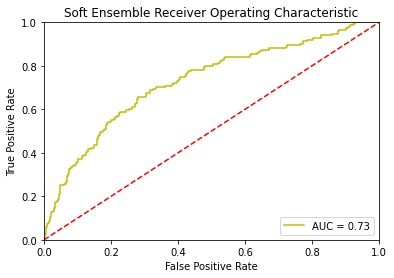

In [15]:
pyplot.title('Soft Ensemble Receiver Operating Characteristic')
pyplot.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
pyplot.legend(loc = 'lower right')
pyplot.plot([0, 1], [0, 1],'r--')
pyplot.xlim([0, 1])
pyplot.ylim([0, 1])
pyplot.ylabel('True Positive Rate')
pyplot.xlabel('False Positive Rate')
pyplot.show()

# Cardio data

In [16]:
df3 = pd.read_csv('cardiovascular_clean.csv')

X = df3.drop(['chd'], axis=1)  # features
y = df3['chd']         #label

C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
# get the dataset
def get_dataset():
    X=x
    y=y 
    return X, y

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
 
# get a voting ensemble of models - hard
def get_voting1():
    # define the base models
    models = list()

    models.append(('RF',RandomForestClassifier(n_estimators=100))) 
    models.append(('MLP',MLPClassifier(solver='adam', learning_rate_init = 0.0005, learning_rate = 'adaptive', activation="relu", max_iter=3000, random_state=10))) 
#     models.append(('DT',DecisionTreeClassifier())) 
    models.append(('KNN',KNeighborsClassifier(n_neighbors=100))) 
    models.append(('SVM',SVC(random_state=1))) 
#     models.append(('NB',GaussianNB())) 
    # define the voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='hard')

    return ensemble

def get_voting2():
    # define the base models - soft 
    models = list()

    models.append(('RF',RandomForestClassifier(n_estimators=100))) 
    models.append(('MLP',MLPClassifier(solver='adam', learning_rate_init = 0.0005, learning_rate = 'adaptive', activation="relu", max_iter=3000, random_state=10))) 
#     models.append(('DT',DecisionTreeClassifier())) 
    models.append(('KNN',KNeighborsClassifier(n_neighbors=100))) 
    models.append(('SVM',SVC(random_state=1,probability=True))) 
#     models.append(('NB',GaussianNB())) 
    # define the voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='soft')

    return ensemble
 
# get a list of models to evaluate
def get_models():
    models = dict()

    models['RF']=RandomForestClassifier(n_estimators=100)
    models['MLP']=MLPClassifier(solver='adam', learning_rate_init = 0.0005, learning_rate = 'adaptive', activation="relu", max_iter=3000, random_state=10) 
    models['DT']=DecisionTreeClassifier()
    models['KNN']=KNeighborsClassifier(n_neighbors=100)
    models['SVM']=SVC(random_state=1)
    models['NB']=GaussianNB()
    models['hard_voting'] = get_voting1()
    models['soft_voting'] = get_voting2()
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    scoring = ['precision_macro', 'recall_macro','accuracy']#'accuracy',
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
    scores = cross_validate(model, X, y, scoring=scoring)#, cv=cv, n_jobs=-1, error_score='raise')
    return scores
 

models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print ('>%s accuracy:%0.3f precision: %.3f recall: %.3f' % (name,mean(scores['test_accuracy']), mean(scores['test_precision_macro']),mean(scores['test_recall_macro'])))
    
    if name in ('soft_voting'):
        probs = model.predict_proba(X_test)
        malignant_probs = probs[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
        roc_auc = auc(fpr, tpr)
        print('aoc for soft voting model is: %0.3f' % (roc_auc))


C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


>RF accuracy:0.690 precision: 0.651 recall: 0.630
>MLP accuracy:0.729 precision: 0.702 recall: 0.675
>DT accuracy:0.647 precision: 0.614 recall: 0.616
>KNN accuracy:0.725 precision: 0.704 recall: 0.649
>SVM accuracy:0.729 precision: 0.711 recall: 0.656
>NB accuracy:0.712 precision: 0.682 recall: 0.681
>hard_voting accuracy:0.727 precision: 0.711 recall: 0.650
>soft_voting accuracy:0.723 precision: 0.698 recall: 0.653
aoc for soft voting model is: 0.704


C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


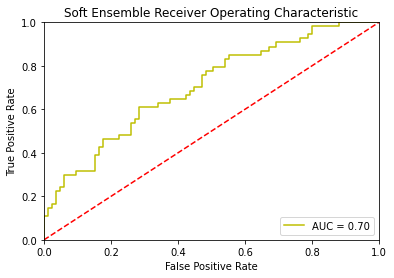

In [18]:
pyplot.title('Soft Ensemble Receiver Operating Characteristic')
pyplot.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
pyplot.legend(loc = 'lower right')
pyplot.plot([0, 1], [0, 1],'r--')
pyplot.xlim([0, 1])
pyplot.ylim([0, 1])
pyplot.ylabel('True Positive Rate')
pyplot.xlabel('False Positive Rate')
pyplot.show()

# Cardio Train

In [19]:
df4 = pd.read_csv('cardio_train1_clean.csv')

# Separate the target from the data set
X = df4.drop(['cardio'], axis=1)
y = df4['cardio']

C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# get the dataset
def get_dataset():
    X=x
    y=y 
    return X, y

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
 
# get a voting ensemble of models - hard
def get_voting1():
    # define the base models
    models = list()

    models.append(('RF',RandomForestClassifier(n_estimators=100))) 
    models.append(('MLP',MLPClassifier(solver='adam', learning_rate_init = 0.0005, learning_rate = 'adaptive', activation="relu", max_iter=3000, random_state=10))) 
#     models.append(('DT',DecisionTreeClassifier())) 
    models.append(('KNN',KNeighborsClassifier(n_neighbors=100))) 
    models.append(('SVM',SVC(random_state=1))) 
#     models.append(('NB',GaussianNB())) 
    # define the voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='hard')

    return ensemble

def get_voting2():
    # define the base models - soft 
    models = list()

    models.append(('RF',RandomForestClassifier(n_estimators=100))) 
    models.append(('MLP',MLPClassifier(solver='adam', learning_rate_init = 0.0005, learning_rate = 'adaptive', activation="relu", max_iter=3000, random_state=10))) 
#     models.append(('DT',DecisionTreeClassifier())) 
    models.append(('KNN',KNeighborsClassifier(n_neighbors=100))) 
    models.append(('SVM',SVC(random_state=1,probability=True))) 
#     models.append(('NB',GaussianNB())) 
    # define the voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='soft')

    return ensemble
 
# get a list of models to evaluate
def get_models():
    models = dict()

    models['RF']=RandomForestClassifier(n_estimators=100)
    models['MLP']=MLPClassifier(solver='adam', learning_rate_init = 0.0005, learning_rate = 'adaptive', activation="relu", max_iter=3000, random_state=10) 
    models['DT']=DecisionTreeClassifier()
    models['KNN']=KNeighborsClassifier(n_neighbors=100)
    models['SVM']=SVC(random_state=1)
    models['NB']=GaussianNB()
    models['hard_voting'] = get_voting1()
    models['soft_voting'] = get_voting2()
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    scoring = ['precision_macro', 'recall_macro','accuracy']#'accuracy',
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
    scores = cross_validate(model, X, y, scoring=scoring)#, cv=cv, n_jobs=-1, error_score='raise')
    return scores
 

models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print ('>%s accuracy:%0.3f precision: %.3f recall: %.3f' % (name,mean(scores['test_accuracy']), mean(scores['test_precision_macro']),mean(scores['test_recall_macro'])))
    
    if name in ('soft_voting'):
        probs = model.predict_proba(X_test)
        malignant_probs = probs[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
        roc_auc = auc(fpr, tpr)
        print('aoc for soft voting model is: %0.3f' % (roc_auc))


C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


>RF accuracy:0.715 precision: 0.716 recall: 0.715
>MLP accuracy:0.673 precision: 0.706 recall: 0.673
>DT accuracy:0.633 precision: 0.633 recall: 0.633
>KNN accuracy:0.703 precision: 0.709 recall: 0.703
>SVM accuracy:0.604 precision: 0.605 recall: 0.604
>NB accuracy:0.592 precision: 0.644 recall: 0.592
>hard_voting accuracy:0.700 precision: 0.711 recall: 0.700
>soft_voting accuracy:0.714 precision: 0.723 recall: 0.714
aoc for soft voting model is: 0.788


C:\Users\Mahsa\anaconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


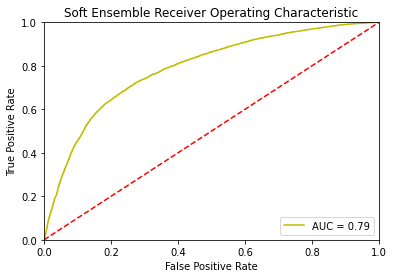

In [21]:
pyplot.title('Soft Ensemble Receiver Operating Characteristic')
pyplot.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
pyplot.legend(loc = 'lower right')
pyplot.plot([0, 1], [0, 1],'r--')
pyplot.xlim([0, 1])
pyplot.ylim([0, 1])
pyplot.ylabel('True Positive Rate')
pyplot.xlabel('False Positive Rate')
pyplot.show()